Drive mount

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


global variable init

In [1]:
pwd_folder = '/content/drive/MyDrive/Colab_Notebooks/VAE/'

Import package

In [2]:
import cv2, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import defaultdict

import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

from drive.MyDrive.Colab_Notebooks.VAE.model import Variatinal_Auto_Encoder, Auto_Encoder
from drive.MyDrive.Colab_Notebooks.VAE.utils import ELBO_loss

MINST data download

In [3]:
train_dataset = datasets.MNIST(root = pwd_folder + "MNIST_data/train",
                               train = True,
                               download = True,
                               transform = transforms.ToTensor( ))

test_dataset = datasets.MNIST(root = pwd_folder + "MNIST_data/test",
                              train = False,
                              download = True,
                              transform = transforms.ToTensor( ))

Data Loader

In [4]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=128, shuffle=False)

Set hyper parameter(Variational Auto Encoder

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

vae_model = Variatinal_Auto_Encoder(device = device).to(device)
epoches = 30
lr = 1e-3
optimizer = optim.Adam(vae_model.parameters(), lr=lr)
Criterion = ELBO_loss

Train, Test

In [7]:
for epoch_i in range(epoches):
  '''----------------Train----------------'''
  vae_model.train()

  train_loss = 0.

  for x, _ in tqdm(train_loader, desc = 'Epoch {}/{}'.format(epoch_i+1, epoches)):
    # batchx1x28x28 -> batchx784
    x  = x.view(x.size()[0], -1).to(device)

    optimizer.zero_grad()
    x_reconst, (mean, stddev), _ = vae_model(x)
    loss, _ = Criterion(x_reconst, x, mean, stddev)
    loss.backward()
    optimizer.step()

    train_loss += loss.item()
  train_loss /= len(train_loader)

  '''----------------Test----------------'''

  vae_model.eval()
  test_loss = 0.
  test_reconst_err = 0.
  test_KL_err = 0.

  with torch.no_grad():
    for x, _ in test_loader:
      x  = x.view(x.size()[0], -1).to(device)
      x_reconst, (mean, stddev), _ = vae_model(x)


      loss, (reconst_err, KL_err) = Criterion(x_reconst, x, mean, stddev)
      test_loss += loss.item()

      test_reconst_err += reconst_err.item()
      test_KL_err      += KL_err.item()

  test_loss /= len(test_loader)

  test_reconst_err /= len(test_loader)
  test_KL_err      /= len(test_loader)

  if (epoch_i+1) % 2 == 0:
    print('Train loss = {:.4f}   Test loss = {:.4f}'.format(train_loss, test_loss))
    print('Test reconst_err, KL_err {:.4f}, {:.4f}'.format(test_reconst_err, test_KL_err))

    if (epoch_i+1) % 30 == 0:
      torch.save(vae_model.state_dict(), pwd_folder + 'weights/VAE_weight_epoch_30_1.pt')

Epoch 2/30: 100%|██████████| 469/469 [00:08<00:00, 57.11it/s]


Train loss = 177.4329   Test loss = 168.1143
Test reconst_err, KL_err 163.9538, 4.1604


Epoch 4/30: 100%|██████████| 469/469 [00:09<00:00, 49.38it/s]


Train loss = 172.9632   Test loss = 164.7254
Test reconst_err, KL_err 160.2522, 4.4732


Epoch 6/30: 100%|██████████| 469/469 [00:08<00:00, 55.16it/s]


Train loss = 171.3946   Test loss = 163.7618
Test reconst_err, KL_err 159.5116, 4.2502


Epoch 8/30: 100%|██████████| 469/469 [00:09<00:00, 51.89it/s]


Train loss = 170.3185   Test loss = 161.8441
Test reconst_err, KL_err 157.2421, 4.6020


Epoch 10/30: 100%|██████████| 469/469 [00:08<00:00, 52.90it/s]


Train loss = 169.6139   Test loss = 160.7794
Test reconst_err, KL_err 156.1145, 4.6649


Epoch 12/30: 100%|██████████| 469/469 [00:08<00:00, 52.99it/s]


Train loss = 168.9672   Test loss = 160.5732
Test reconst_err, KL_err 156.0183, 4.5550


Epoch 14/30: 100%|██████████| 469/469 [00:09<00:00, 49.12it/s]


Train loss = 168.3789   Test loss = 159.3380
Test reconst_err, KL_err 154.5664, 4.7716


Epoch 16/30: 100%|██████████| 469/469 [00:08<00:00, 55.08it/s]


Train loss = 168.0340   Test loss = 159.2112
Test reconst_err, KL_err 154.3547, 4.8565


Epoch 18/30: 100%|██████████| 469/469 [00:09<00:00, 50.81it/s]


Train loss = 167.7977   Test loss = 159.4329
Test reconst_err, KL_err 154.7711, 4.6618


Epoch 20/30: 100%|██████████| 469/469 [00:08<00:00, 58.50it/s]


Train loss = 167.4428   Test loss = 159.2493
Test reconst_err, KL_err 154.6018, 4.6475


Epoch 22/30: 100%|██████████| 469/469 [00:09<00:00, 51.34it/s]


Train loss = 167.2074   Test loss = 159.4850
Test reconst_err, KL_err 154.6049, 4.8801


Epoch 24/30: 100%|██████████| 469/469 [00:07<00:00, 59.70it/s]


Train loss = 166.9419   Test loss = 157.6975
Test reconst_err, KL_err 152.5405, 5.1570


Epoch 26/30: 100%|██████████| 469/469 [00:09<00:00, 51.92it/s]


Train loss = 166.8147   Test loss = 157.6033
Test reconst_err, KL_err 152.6474, 4.9560


Epoch 28/30: 100%|██████████| 469/469 [00:07<00:00, 59.08it/s]


Train loss = 166.5451   Test loss = 157.6548
Test reconst_err, KL_err 152.7300, 4.9248


Epoch 30/30: 100%|██████████| 469/469 [00:08<00:00, 52.29it/s]


Train loss = 166.3807   Test loss = 157.5289
Test reconst_err, KL_err 152.5611, 4.9678


Set hyper parameter(Auto Encoder)

In [7]:
ae_model = Auto_Encoder().to(device)
epoches = 30
lr = 1e-3
optimizer = optim.Adam(ae_model.parameters(), lr=lr)
Criterion = nn.BCELoss()

Train/Test

In [8]:
for epoch_i in range(epoches):
  '''----------------Train----------------'''
  ae_model.train()

  train_loss = 0.

  for x, _ in tqdm(train_loader, desc = 'Epoch {}/{}'.format(epoch_i+1, epoches)):
    x  = x.view(x.size()[0], -1).to(device)

    optimizer.zero_grad()
    x_reconst, _ = ae_model(x)
    loss = Criterion(x_reconst,x)
    loss.backward()
    optimizer.step()

    train_loss += loss.item()
  train_loss /= len(train_loader)

  '''----------------Test----------------'''

  ae_model.eval()
  test_loss = 0.

  with torch.no_grad():
    for x, _ in test_loader:
      x  = x.view(x.size()[0], -1).to(device)
      x_reconst, _ = ae_model(x)


      loss = Criterion(x_reconst, x)
      test_loss += loss.item()

  test_loss /= len(test_loader)

  if (epoch_i+1) % 30 == 0:
    torch.save(ae_model.state_dict(), pwd_folder + 'weights/AE_weight_epoch_30_3.pt')
    print('Train loss = {:.4f}   Test loss = {:.4f}'.format(train_loss, test_loss))

Epoch 30/30: 100%|██████████| 469/469 [00:08<00:00, 53.63it/s]


Train loss = 0.1993   Test loss = 0.1859


학습 가중치 저장 및 불러오기

In [15]:
index = 3

load_vae_model = Variatinal_Auto_Encoder(device = device)
load_vae_model.load_state_dict(torch.load(pwd_folder + 'weights/VAE_weight_epoch_30_{}.pt'.format(index)))
load_vae_model = load_vae_model.to(device)

load_ae_model = Auto_Encoder()
load_ae_model.load_state_dict(torch.load(pwd_folder + 'weights/AE_weight_epoch_30_{}.pt'.format(index)))
load_ae_model = load_ae_model.to(device)

class 별 Latent vector 확인(학습된 mean, stddev 에서 Sampling)

In [16]:
vae_z_dict = defaultdict(int)
ae_z_dict = defaultdict(int)

reconst_dict = defaultdict(int)

for class_i in range(10):
  idx = test_dataset.targets == class_i
  datset_class_i = test_dataset.data[idx][:400]

  load_vae_model.eval()
  load_ae_model.eval()
  with torch.no_grad():
    x = datset_class_i.view(datset_class_i.size()[0], -1)
    x = x.type(torch.FloatTensor)
    x = x.to(device)
    reconst_x, (_, _), z_vae = load_vae_model(x)
    _, z_ae = load_ae_model(x)

    reconst_img = reconst_x.view(reconst_x.size()[0], 28, 28)
    reconst_img = reconst_img.detach().to('cpu')
    reconst_dict['reconst_class_{}'.format(class_i)] = reconst_img

    z_vae = z_vae.detach().to('cpu')
    vae_z_dict['z_class_{}'.format(class_i)] = z_vae

    z_ae = z_ae.detach().to('cpu')
    ae_z_dict['z_class_{}'.format(class_i)] = z_ae

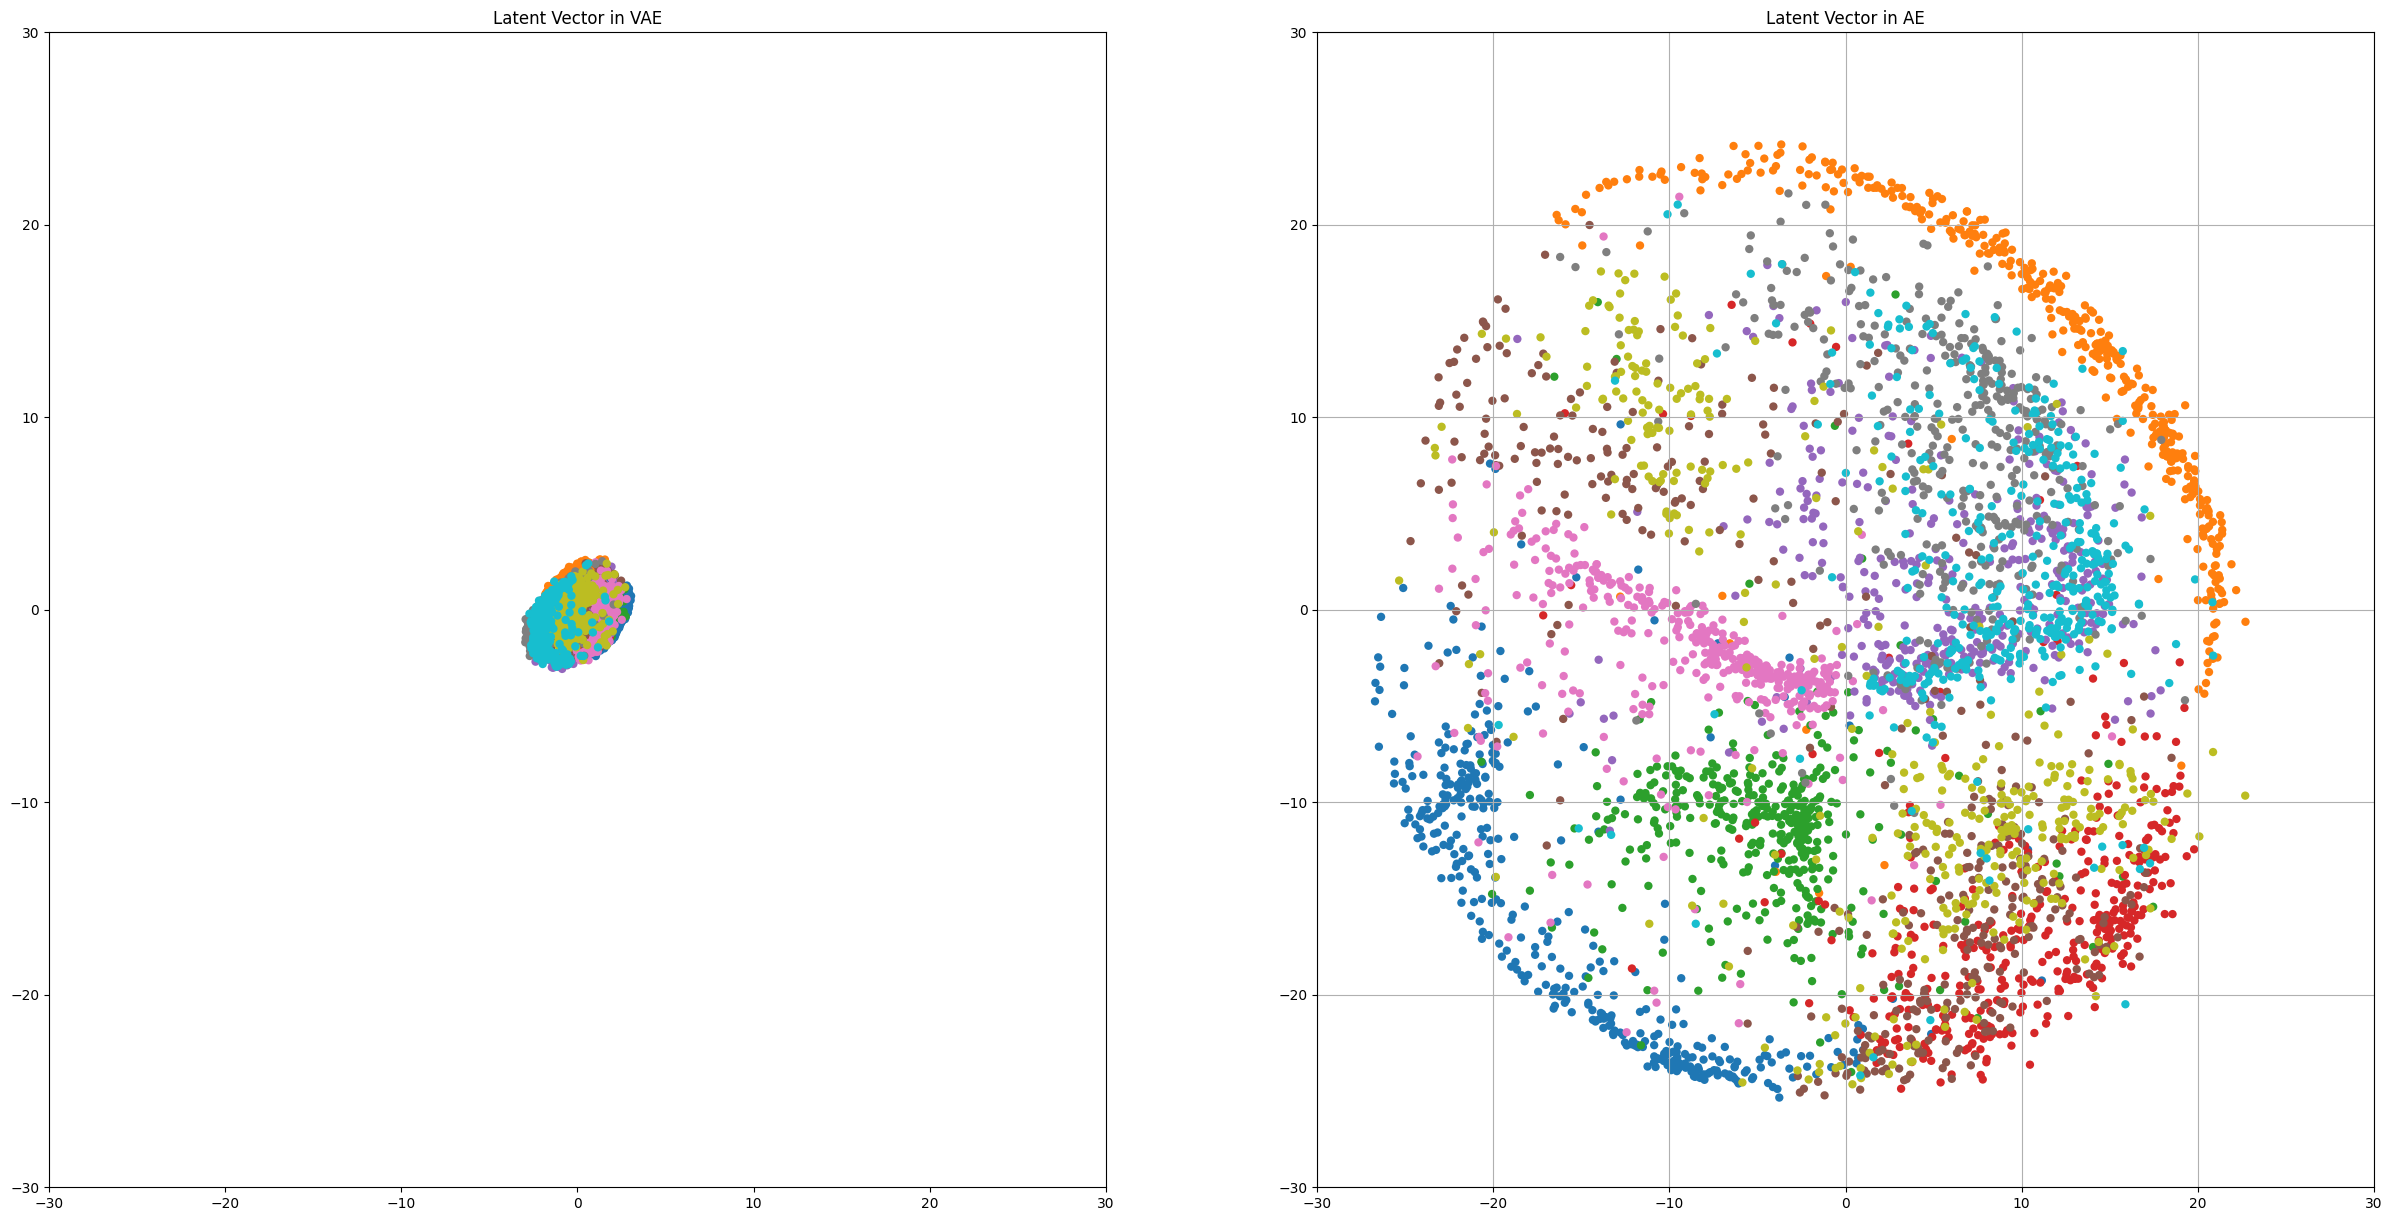

In [17]:
import matplotlib.colors as mcolors

color_list = mcolors.TABLEAU_COLORS

fig, ax = plt.subplots(1,2, figsize=(30, 15))
x, y, color = [], [], []

for class_i, z in enumerate(vae_z_dict.values()):
  x.append(z[:,0].tolist())
  y.append(z[:,1].tolist())
  color += [list(color_list.keys())[class_i]]*z.size()[0]

x, y, color = np.array(x), np.array(y), np.array(color)
x = x.reshape(-1)
y = y.reshape(-1)
color = color.reshape(-1)
ax[0].set_title('Latent Vector in VAE')
ax[0].scatter(x, y, c=color, marker='o', edgecolor='none')
ax[0].set_xlim([-30, 30])
ax[0].set_ylim([-30, 30])
plt.grid(True)

x, y, color = [], [], []

for class_i, z in enumerate(ae_z_dict.values()):
  x.append(z[:,0].tolist())
  y.append(z[:,1].tolist())
  color += [list(color_list.keys())[class_i]]*z.size()[0]

x, y, color = np.array(x), np.array(y), np.array(color)
x = x.reshape(-1)
y = y.reshape(-1)
color = color.reshape(-1)
ax[1].set_title('Latent Vector in AE')
ax[1].scatter(x, y, c=color, marker='o', edgecolor='none')
ax[1].set_xlim([-30, 30])
ax[1].set_ylim([-30, 30])
plt.grid(True)

fig.savefig(pwd_folder + 'result/figure_index_{}.png'.format(index))

z 값에 변화에 따른 reconstruction img

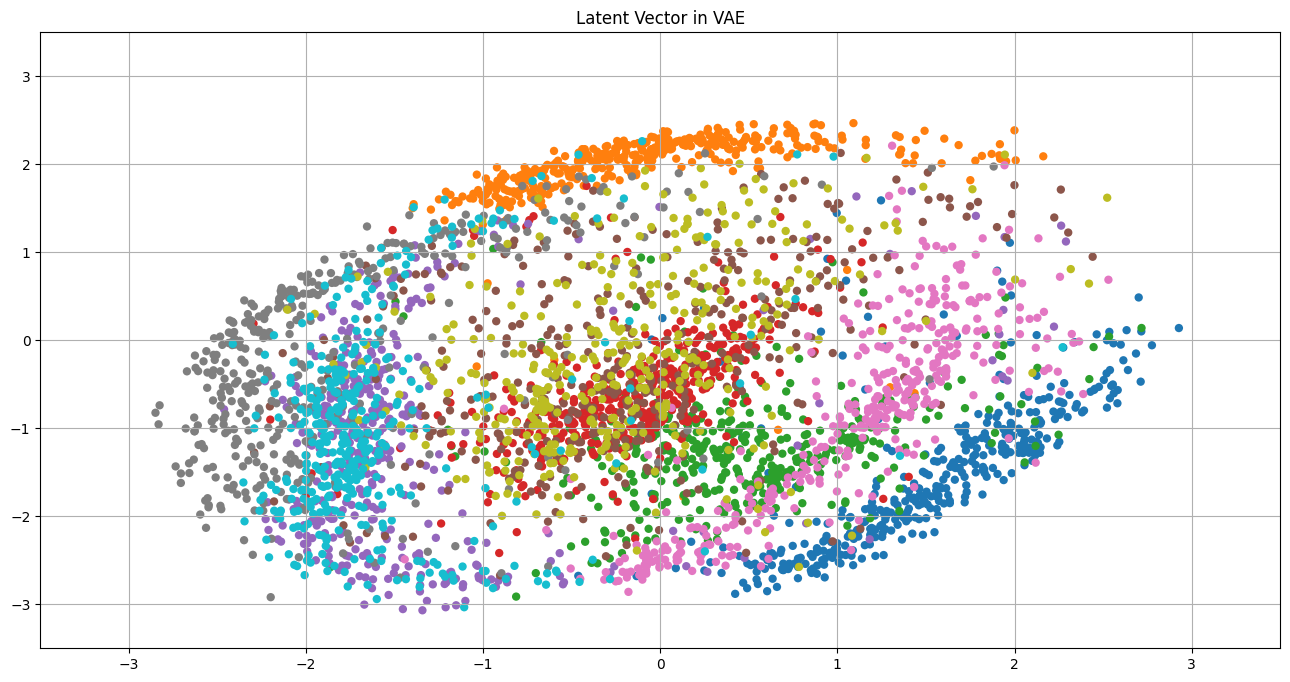

In [ ]:
import matplotlib.colors as mcolors

color_list = mcolors.TABLEAU_COLORS

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
x, y, color = [], [], []

for class_i, z in enumerate(vae_z_dict.values()):
  x.append(z[:,0].tolist())
  y.append(z[:,1].tolist())
  color += [list(color_list.keys())[class_i]]*z.size()[0]

x, y, color = np.array(x), np.array(y), np.array(color)
x = x.reshape(-1)
y = y.reshape(-1)
color = color.reshape(-1)
ax.set_title('Latent Vector in VAE')
ax.scatter(x, y, c=color, marker='o', edgecolor='none')
ax.set_xlim([-3.5, 3.5])
ax.set_ylim([-3.5, 3.5])
plt.grid(True)

In [ ]:
x = np.arange(-2.5, 2.5 + 0.25, 0.25)
y = np.arange(-2.5, 2.5 + 0.25, 0.25)
test_z = []

for x_ in x:
  for y_ in y:
    test_z.append([x_, y_])

test_z = np.array(test_z)

In [ ]:
load_vae_model.eval()

with torch.no_grad():
  test_z = torch.FloatTensor(test_z).to(device)
  reconst_x = load_vae_model.decoder(test_z)
  reconst_img = reconst_x.view(reconst_x.size()[0], 28, 28)
  reconst_img = reconst_img.detach().to('cpu')

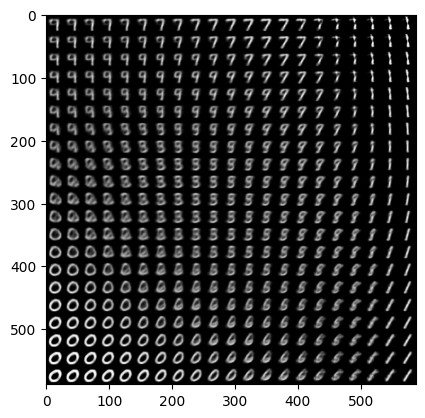

In [ ]:
map_img = torch.ones(28*21, 28*21)

i = 0
for r in range(21):
  for c in range(21):
    map_img[r*28:r*28+28, c*28:c*28+28] = reconst_img[i]
    i += 1
save_folder = pwd_folder+'result/'

map_img = np.array(map_img*255).astype(np.uint8)
map_img_bgr = cv2.cvtColor(map_img, cv2.COLOR_GRAY2BGR)
cv2.imwrite(save_folder+'z_map.jpg', map_img_bgr)

plt.imshow(map_img, cmap='gray')

Save reconstruction img

In [ ]:
for class_i in list(reconst_dict.keys()):
  imgs = reconst_dict[class_i][:10]
  save_folder = pwd_folder+'result/reconst_imgs/'+class_i.split('reconst_')[-1]+'/'

  if not os.path.exists(save_folder):
    os.makedirs(save_folder)

  for idx, img in enumerate(imgs):
    img = np.array(img*255).astype(np.uint8)
    bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2.imwrite(save_folder+'img_{}.jpg'.format(idx), bgr)